In [1]:
##Imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import time
import glob

import skimage.io as io
io.use_plugin('tifffile')
from skimage import morphology
from skimage.filters import threshold_adaptive
from skimage.measure import regionprops
from skimage.morphology import watershed
from skimage.feature import peak_local_max
import mahotas as mh
from scipy import ndimage
from scipy.spatial import Delaunay
from scipy.ndimage import distance_transform_edt

In [5]:
def add_edge(i, j):
    
    edge_points = []
    edges = set()
    
    """Add a line between the i-th and j-th points, if not in the list already"""
    if (i, j) in edges or (j, i) in edges:
        # already added
        return
    edges.add( (i, j) )
    edge_points.append(points[ [i, j] ])
    
    return [edges, edge_points]

In [5]:
#load Hoechst and GFP stacks from .ome.tif files
def load_ome(ome_stack_file):

    #MMStack .ome.tif files load channel,z,y,x
    #Check file contains .ome.tif
    if '.ome.tif' in ome_stack_file:

        #Load the file
        im=io.imread(ome_stack_file)

        #Select Hoechst stack
        Hoechst_stack = im[0,:,:,:] #Hoechst Channel = 0
        GFP_stack = im[1,:,:,:]     #GFP Channel = 1
        
        #
        return [Hoechst_stack, GFP_stack]
        #return GFP_stack
        
    else:
        print 'this is not an ome.tif'

In [4]:

points = np.random.rand(30, 2) # 30 points in 2-d
tri = Delaunay(points)

# Make a list of line segments: 
# edge_points = [ ((x1_1, y1_1), (x2_1, y2_1)),
#                 ((x1_2, y1_2), (x2_2, y2_2)),
#                 ... ]




# loop over triangles: 
# ia, ib, ic = indices of corner points of the triangle
for ia, ib, ic in tri.vertices:
    add_edge(ia, ib)
    add_edge(ib, ic)
    add_edge(ic, ia)

# plot it: the LineCollection is just a (maybe) faster way to plot lots of
# lines at once
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

lines = LineCollection(edge_points)
plt.figure()
plt.title('Delaunay triangulation')
plt.gca().add_collection(lines)
plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.xlim(-1, 2)
plt.ylim(-1, 2)

# -- the same stuff for the convex hull

edges = set()
edge_points = []

for ia, ib in tri.convex_hull:
    add_edge(ia, ib)

lines = LineCollection(edge_points)
plt.figure()
plt.title('Convex hull')
plt.gca().add_collection(lines)
plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()

NameError: name 'edge_points' is not defined

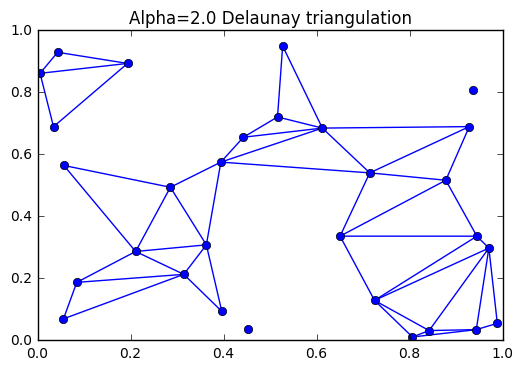

In [3]:
edges = set()
edge_points = []
alpha = 6

# loop over triangles:
# ia, ib, ic = indices of corner points of the triangle
for ia, ib, ic in tri.vertices:
    pa = points[ia]
    pb = points[ib]
    pc = points[ic]

    # Lengths of sides of triangle
    a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
    b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
    c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)

    # Semiperimeter of triangle
    s = (a + b + c)/2.0

    # Area of triangle by Heron's formula
    area = math.sqrt(s*(s-a)*(s-b)*(s-c))

    circum_r = a*b*c/(4.0*area)

    # Here's the radius filter.
    if circum_r < 1.0/alpha:
        add_edge(ia, ib)
        add_edge(ib, ic)
        add_edge(ic, ia)

lines = LineCollection(edge_points)
plt.figure()
plt.title('Alpha=2.0 Delaunay triangulation')
plt.gca().add_collection(lines)
plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.show()

Can this be applied to my objects?

In [6]:
#[2] Get targeted filelist
path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/'

target='.ome.tif'

filelist=glob.glob(path+str('*')+target)

shell_list=glob.glob(path+str('/Output/Shells/*Split_Shells.npy'))

In [7]:
[Hoechst_stack, GFP_stack] = load_ome(filelist[4])

In [8]:
#[1] Get targeted filelist
path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Output/'

target='_Mask5.npy'

masklist=glob.glob(path+str('*')+target)

In [9]:
mask5 = np.load(masklist[1])

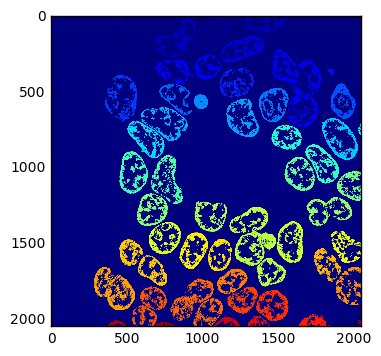

In [10]:
plt.imshow(mask5[8])

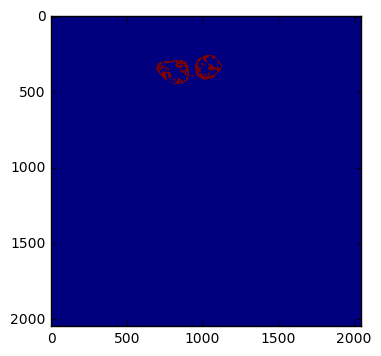

In [11]:
plt.imshow(mask5[8]==6)

In [12]:
##Convert mask to points
points=np.transpose(np.nonzero(mask5[8]==6))

#convert row, column coordinates to x, y
points = np.fliplr(points)

tri = Delaunay(points)

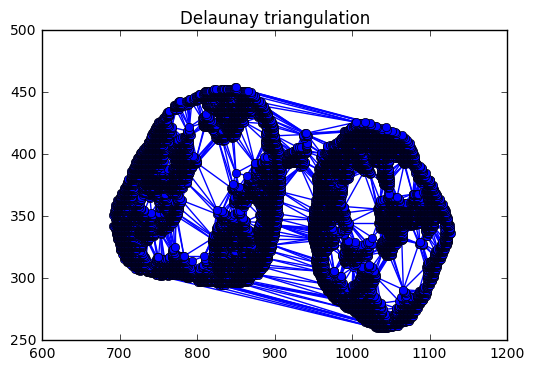

In [13]:
edge_points = []
edges = set()

# loop over triangles: 
# ia, ib, ic = indices of corner points of the triangle
for ia, ib, ic in tri.vertices:
    add_edge(ia, ib)
    add_edge(ib, ic)
    add_edge(ic, ia)

lines = LineCollection(edge_points)
plt.figure()
plt.title('Delaunay triangulation')
plt.gca().add_collection(lines)
plt.plot(points[:,0], points[:,1], 'o', hold=1) #row column coordinates are mixed

(600, 0)

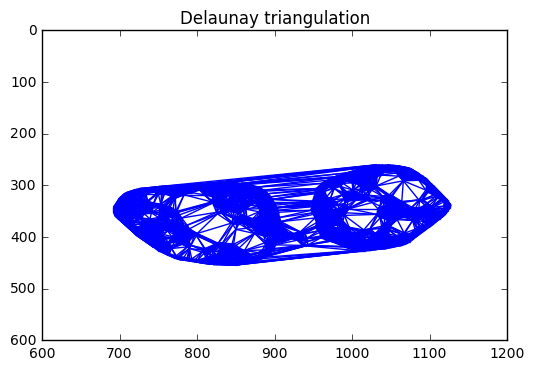

In [57]:
edge_points = []
edges = set()

# loop over triangles: 
# ia, ib, ic = indices of corner points of the triangle
for ia, ib, ic in tri.vertices:
    add_edge(ia, ib)
    add_edge(ib, ic)
    add_edge(ic, ia)

lines = LineCollection(edge_points)
plt.figure()
plt.title('Delaunay triangulation')
plt.gca().add_collection(lines)
#plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.xlim(600, 1200)  
plt.ylim(600, 0)     #Flip y axis

What about alpha?

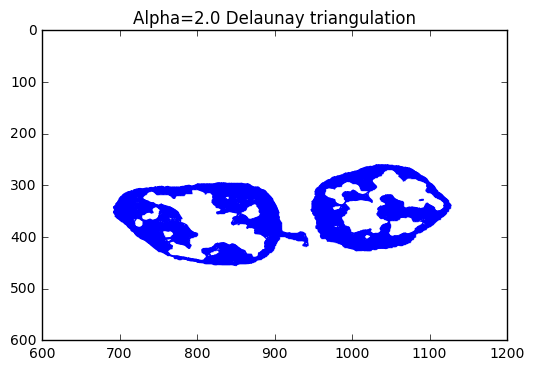

In [58]:
edges = set()
edge_points = []
alpha = 0.25

# loop over triangles:
# ia, ib, ic = indices of corner points of the triangle
for ia, ib, ic in tri.vertices:
    pa = points[ia]
    pb = points[ib]
    pc = points[ic]

    # Lengths of sides of triangle
    a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
    b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
    c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)

    # Semiperimeter of triangle
    s = (a + b + c)/2.0

    # Area of triangle by Heron's formula
    area = math.sqrt(s*(s-a)*(s-b)*(s-c))

    circum_r = a*b*c/(4.0*area)

    # Here's the radius filter.
    if circum_r < 1.0/alpha:
        add_edge(ia, ib)
        add_edge(ib, ic)
        add_edge(ic, ia)

lines = LineCollection(edge_points)
plt.figure()
plt.title('Alpha=2.0 Delaunay triangulation')
plt.gca().add_collection(lines)
#plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.xlim(600, 1200)  
plt.ylim(600, 0)
plt.show()

Can I convert this to a filled shape?

In [59]:
lines

In [60]:
#I have the edge_points of triangles within my cutoff
points

array([[1032,  260],
       [1035,  260],
       [1036,  260],
       ..., 
       [ 850,  453],
       [ 849,  454],
       [ 850,  454]], dtype=int64)

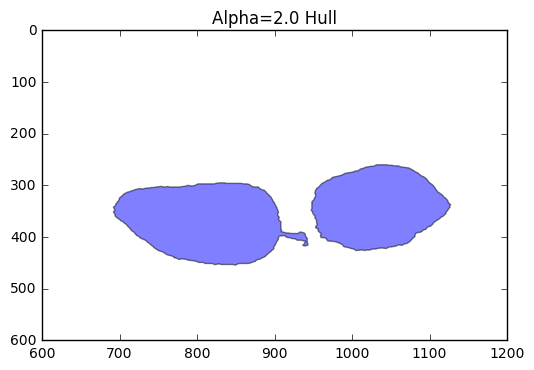

In [61]:
from descartes import PolygonPatch
from shapely.geometry import MultiLineString
from shapely.ops import cascaded_union, polygonize

m = MultiLineString(edge_points)
triangles = list(polygonize(m))

plt.figure()
plt.title("Alpha=2.0 Hull")
plt.gca().add_patch(PolygonPatch(cascaded_union(triangles), alpha=0.5))
plt.gca().autoscale(tight=False)
#plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.xlim(600, 1200)  
plt.ylim(600, 0)
plt.show()

Can I now get the contour of the patch?

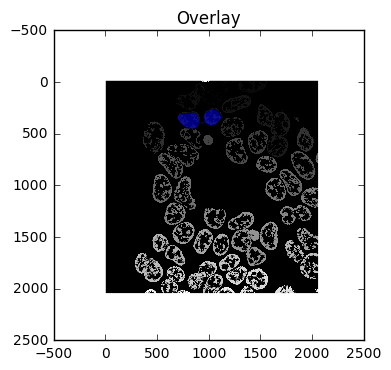

In [62]:
plt.figure()
plt.title("Overlay")
plt.imshow(mask5[8], cmap='gray')
plt.gca().add_patch(PolygonPatch(cascaded_union(triangles), alpha=0.5))
plt.gca().autoscale(tight=False)
#plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.show()

In [63]:
ptch = PolygonPatch(cascaded_union(triangles))

In [64]:
polypath = ptch.get_path()

In [65]:
polypath.vertices

array([[ 1075.,   268.],
       [ 1074.,   267.],
       [ 1073.,   266.],
       ..., 
       [  833.,   295.],
       [  832.,   295.],
       [  828.,   295.]])

(600, 0)

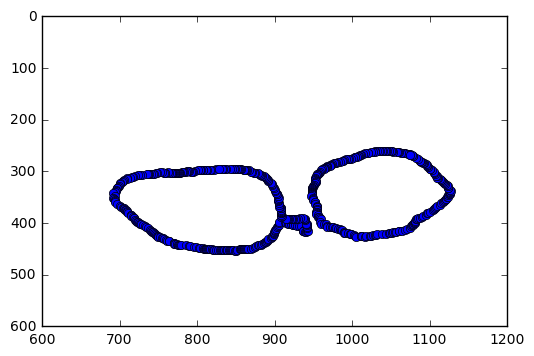

In [66]:
plt.plot(polypath.vertices[:,0], polypath.vertices[:,1], 'o', hold=1)
plt.xlim(600, 1200)  
plt.ylim(600, 0)

Can we separate the two paths?

In [67]:
polypath.codes

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2,

In [68]:
np.nonzero(polypath.codes==1)

(array([  0, 237], dtype=int64),)

(600, 0)

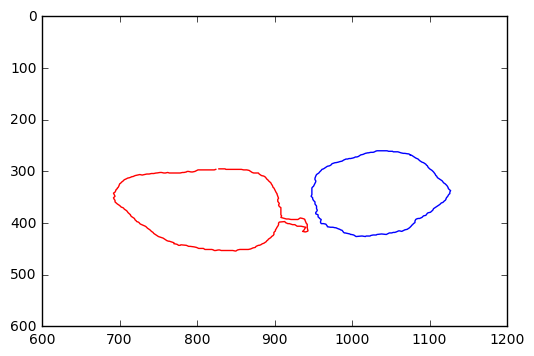

In [69]:
plt.plot(polypath.vertices[0:237,0], polypath.vertices[0:237,1])
plt.plot(polypath.vertices[238:,0], polypath.vertices[238:,1], color='red')
plt.xlim(600, 1200)  
plt.ylim(600, 0)

Can we go from polygon to mask?

In [ ]:
from matplotlib.path import Path

In [ ]:
from skimage.measure import grid_points_in_poly

shape=mask5[8].shape

#flip 
vert = np.fliplr(polypath.vertices)

mask8 = grid_points_in_poly(shape, vert)

In [ ]:
plt.imshow(mask8)

In [ ]:
# import numpy as np
# from matplotlib.path import Path

# nx, ny = 10, 10
# poly_verts = [(1,1), (5,1), (5,9),(3,2),(1,1)]

# # Create vertex coordinates for each grid cell...
# # (<0,0> is at the top left of the grid in this system)
# x, y = np.meshgrid(np.arange(nx), np.arange(ny))
# x, y = x.flatten(), y.flatten()

# points = np.vstack((x,y)).T

# path = Path(poly_verts)
# grid = path.contains_points(points)
# grid = grid.reshape((ny,nx))

# print grid

RuntimeError: Can not put single artist in more than one figure

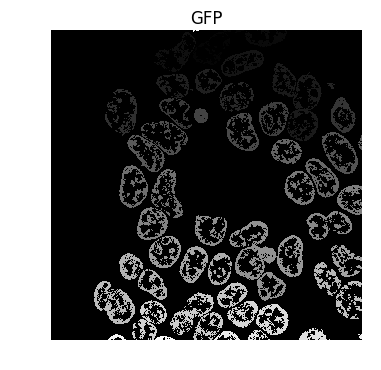

In [26]:
fig = plt.figure()
plt.imshow(mask5[8], interpolation='nearest', cmap=plt.cm.gray)
plt.axis('off')
plt.title('GFP')

ax = fig.add_subplot(1,1,1)
ax.add_patch(ptch)
ax.autoscale(tight=False)


RuntimeError: Can not put single artist in more than one figure

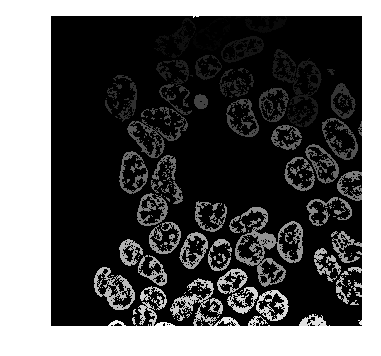

In [24]:
#Overlay over original image
plt.imshow(mask5[8], interpolation='nearest', cmap=plt.cm.gray)


ax=plt.gca()
ax.add_patch(ptch)
ax.autoscale(tight=False)
    


In [47]:
from matplotlib.patches import Polygon

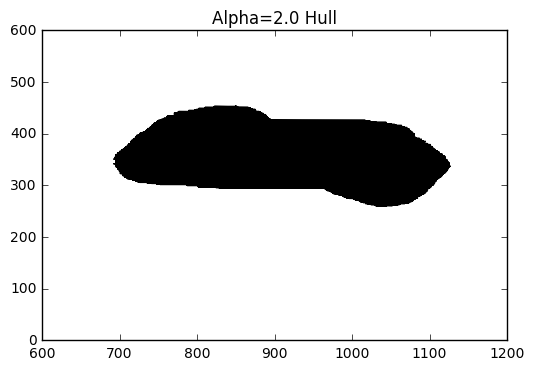

In [49]:
poly= Polygon(points)

plt.figure()
plt.title("Alpha=2.0 Hull")

plt.gca().add_patch(poly)
#plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.xlim(600, 1200)  
plt.ylim(0, 600)
plt.show()

In [57]:
#Extract points from alphashape
new_points = []

for line in edge_points:
    new = line[0]
    new_points.append(new)
    
new_points = np.asarray(new_points)

In [58]:
new_points[:,0]

array([1068, 1070, 1071, ..., 1013, 1013, 1013], dtype=int64)

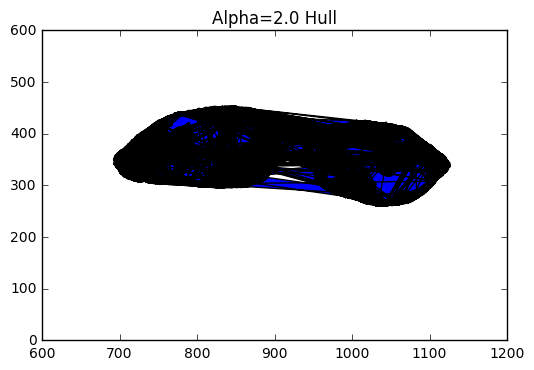

In [61]:
poly= Polygon(new_points)

plt.figure()
plt.title("Alpha=2.0 Hull")

plt.gca().add_patch(poly)
#plt.plot(new_points[:,0], new_points[:,1], 'o', hold=1)
plt.xlim(600, 1200)  
plt.ylim(0, 600)
plt.show()

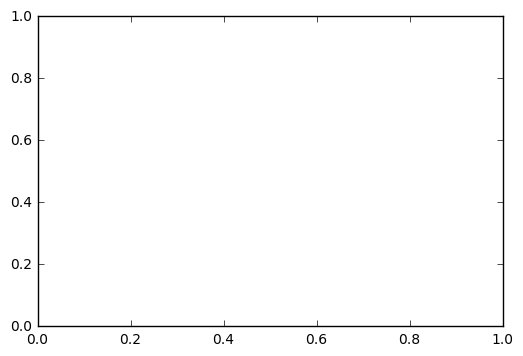

In [194]:
#Convert edges to objects?
# The same data as above, but fill the curves.

from matplotlib.collections import PolyCollection, transforms

fig, ax = plt.subplots()
col = PolyCollection(edge_points)
trans = transforms.Affine2D().scale(fig.dpi/72.0)
col.set_transform(trans)  # the points to pixels transform
ax.add_collection(col, autolim=True)
col.set_color('red')


In [70]:
from matplotlib.pyplot import contourf

TypeError: Input must be a 2D array.

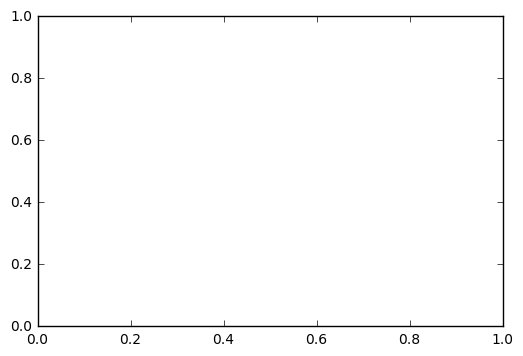

In [72]:
contourf(edge_points)

In [62]:
from shapely.geometry import MultiLineString
from shapely.ops import cascaded_union, polygonize

In [34]:
edge_points[0][0]

array([ 0.91587715,  0.87256401])

In [195]:
edges #indexes of points

{(8569, 8394),
 (13274, 13400),
 (14032, 14160),
 (22172, 22173),
 (17359, 17534),
 (9203, 9009),
 (11585, 11758),
 (2504, 2505),
 (3451, 3450),
 (16764, 16576),
 (9415, 9414),
 (17066, 17238),
 (15810, 15524),
 (422, 421),
 (20128, 20129),
 (17602, 17776),
 (16683, 16682),
 (7360, 7520),
 (19792, 19914),
 (12055, 11882),
 (11596, 11597),
 (17143, 17144),
 (21562, 21629),
 (16878, 16699),
 (19581, 19582),
 (16250, 16249),
 (19684, 19811),
 (16488, 16657),
 (16295, 16157),
 (13219, 13220),
 (13200, 13330),
 (843, 774),
 (21089, 21237),
 (3267, 3266),
 (19968, 20096),
 (7047, 7200),
 (18213, 18214),
 (9593, 9392),
 (17537, 17361),
 (8606, 8605),
 (18153, 17981),
 (14124, 13997),
 (22288, 22170),
 (18078, 18244),
 (2248, 2363),
 (15219, 15220),
 (11041, 11042),
 (5672, 5673),
 (7296, 7450),
 (4760, 4604),
 (11885, 11886),
 (8471, 9026),
 (3309, 3310),
 (897, 964),
 (20642, 20556),
 (15377, 15244),
 (3424, 3425),
 (15055, 15056),
 (10501, 11101),
 (13989, 13988),
 (11308, 11476),
 (2225, 2

In [11]:
##Does it work in 3D?
##Convert mask to points
points=np.transpose(np.nonzero(mask5==6))
points #z, r, c

array([[   0,  259, 1040],
       [   0,  259, 1047],
       [   0,  259, 1049],
       ..., 
       [  23,  444,  954],
       [  23,  445,  955],
       [  23,  448,  953]], dtype=int64)

In [12]:
##Much slower than 2D (13minutes for 506,144)
t0=time.time()
tri3D = Delaunay(points)
t1=time.time()
print t1-t0

796.496999979


In [13]:
#How many points are there in the 3D mask?
len(points)

506144

In [ ]:
#Perhaps we can drop points by reducing the mask to its outline?
